In [1]:
import findspark
findspark.init()
import pyspark
import re
from random import random

In [3]:
#### Input data
sc = ss.sparkContext
#taxi = sc.textFile("/scratch/ISE495/taxi_data/green_tripdata_2015-09_small.csv")
header = sc.textFile("/scratch/ISE495/taxi_data/header.txt")
taxi = sc.textFile("/scratch/ISE495/taxi_data/green_tripdata_2015-09.csv")

In [4]:
for i in taxi.take(10):
    print i

2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979484558105469,40.684955596923828,-73.97943115234375,40.685020446777344,1,.00,7.8,0,0,1.95,0,,0,9.75,1,2
2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010795593261719,40.912216186523438,-74.010780334472656,40.912212371826172,1,.00,45,0,0,0,0,,0,45,1,2
2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921409606933594,40.766708374023438,-73.914413452148438,40.764686584472656,1,.59,4,0.5,0.5,0.5,0,,0.3,5.8,1,1
2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.92138671875,40.766677856445313,-73.931427001953125,40.771583557128906,1,.74,5,0.5,0.5,0,0,,0.3,6.3,2,1
2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482482910156,40.714046478271484,-73.944412231445313,40.714729309082031,1,.61,5,0.5,0.5,0,0,,0.3,6.3,2,1
2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297241210938,40.808185577392578,-73.937667846679688,40.821197509765625,1,1.07,5.5,0.5,0.5,1.36,0,,0.3,8.16,1,1
2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.8908767700

In [5]:
for i in header.take(5):
    print i

VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type


In [6]:
print header.map(lambda l:l.split(","))

PythonRDD[7] at RDD at PythonRDD.scala:48


In [7]:
splitTaxi = taxi.map(lambda l: l.split(","))

In [8]:
print splitTaxi.take(3)

[[u'2', u'2015-09-01 00:02:34', u'2015-09-01 00:02:38', u'N', u'5', u'-73.979484558105469', u'40.684955596923828', u'-73.97943115234375', u'40.685020446777344', u'1', u'.00', u'7.8', u'0', u'0', u'1.95', u'0', u'', u'0', u'9.75', u'1', u'2'], [u'2', u'2015-09-01 00:04:20', u'2015-09-01 00:04:24', u'N', u'5', u'-74.010795593261719', u'40.912216186523438', u'-74.010780334472656', u'40.912212371826172', u'1', u'.00', u'45', u'0', u'0', u'0', u'0', u'', u'0', u'45', u'1', u'2'], [u'2', u'2015-09-01 00:01:50', u'2015-09-01 00:04:24', u'N', u'1', u'-73.921409606933594', u'40.766708374023438', u'-73.914413452148438', u'40.764686584472656', u'1', u'.59', u'4', u'0.5', u'0.5', u'0.5', u'0', u'', u'0.3', u'5.8', u'1', u'1']]


In [9]:
taxiTuples = splitTaxi.map(lambda p: (p[0], p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8], p[9], p[10], p[11],
                                     p[12], p[13], p[14], p[15], p[16], p[17], p[18],p[19],p[20]))

In [10]:
print taxiTuples.take(1)

[(u'2', u'2015-09-01 00:02:34', u'2015-09-01 00:02:38', u'N', u'5', u'-73.979484558105469', u'40.684955596923828', u'-73.97943115234375', u'40.685020446777344', u'1', u'.00', u'7.8', u'0', u'0', u'1.95', u'0', u'', u'0', u'9.75', u'1', u'2')]


In [11]:
from pyspark.sql.types import *

splitTaxi = taxi.map(lambda l: l.split(","))
# Each line is converted to a tuple.
taxiTuples = splitTaxi.map(lambda p: (p[0], p[1], p[2], p[3], p[4], float(p[5]), float(p[6]), float(p[7]), 
                                      float(p[8]), p[9], float(p[10]), float(p[11]),
                                     p[12], p[13], float(p[14]), p[15], p[16], p[17], float(p[18]),
                                      p[19],p[20]))

# The schema is encoded in a string.
fields = [StructField("VendorID", StringType(), True),
          StructField("lpep_pickup_datetime", StringType(), True),
          StructField("Lpep_dropoff_datetime", StringType(), True),
          StructField("Store_and_fwd_flag", StringType(), True),
          StructField("RateCodeID", StringType(), True),
          StructField("Pickup_longitude", FloatType(), True),
          StructField("Pickup_latitude", FloatType(), True),
          StructField("Dropoff_longitude", FloatType(), True),
          StructField("Dropoff_latitude", FloatType(), True),
          StructField("Passenger_count", StringType(), True),
          StructField("Trip_distance", FloatType(), True),
          StructField("Fare_amount", FloatType(), True),
          StructField("Extra", StringType(), True),
          StructField("MTA_tax", StringType(), True),
          StructField("Tip_amount", FloatType(), True),
          StructField("Tolls_amount", StringType(), True),
          StructField("Ehail_fee", StringType(), True),
          StructField("improvement_surcharge", StringType(), True),
          StructField("Total_amount", FloatType(), True),
          StructField("Payment_type", StringType(), True),
          StructField("Trip_type", StringType(), True),
         ]
schema = StructType(fields)

taxiDF = ss.createDataFrame(taxiTuples, schema)
print taxiDF.show(2)
taxiDF.printSchema()

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+
|       2| 2015-09-01 00:02:34|  2015-09-01 00:02:38|                 N|         5|      -73.979485|

In [12]:
taxiDF.count()

1494926

In [13]:
print taxiDF.columns ## Column Names
print "Row Count: ", taxiDF.count() ## Row Count
print "Column Count: ", len(taxiDF.columns) ## Column Count

['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge', 'Total_amount', 'Payment_type', 'Trip_type']
Row Count:  1494926
Column Count:  21


In [14]:
len(taxiDF.columns), taxiDF.columns

(21,
 ['VendorID',
  'lpep_pickup_datetime',
  'Lpep_dropoff_datetime',
  'Store_and_fwd_flag',
  'RateCodeID',
  'Pickup_longitude',
  'Pickup_latitude',
  'Dropoff_longitude',
  'Dropoff_latitude',
  'Passenger_count',
  'Trip_distance',
  'Fare_amount',
  'Extra',
  'MTA_tax',
  'Tip_amount',
  'Tolls_amount',
  'Ehail_fee',
  'improvement_surcharge',
  'Total_amount',
  'Payment_type',
  'Trip_type'])

In [15]:
taxiDF.describe().show()

+-------+-------------------+--------------------+---------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+-------------------+------------------+-------------------+---------+---------------------+------------------+------------------+-------------------+
|summary|           VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|        RateCodeID|  Pickup_longitude|   Pickup_latitude| Dropoff_longitude|  Dropoff_latitude|   Passenger_count|    Trip_distance|       Fare_amount|              Extra|            MTA_tax|        Tip_amount|       Tolls_amount|Ehail_fee|improvement_surcharge|      Total_amount|      Payment_type|          Trip_type|
+-------+-------------------+--------------------+---------------------+------------------+------------------+------------------+------------------+------------------+---------

In [16]:
taxiDF.describe('VendorID').show()

+-------+------------------+
|summary|          VendorID|
+-------+------------------+
|  count|           1494926|
|   mean|1.7820447299732562|
| stddev|0.4128569780370993|
|    min|                 1|
|    max|                 2|
+-------+------------------+



In [17]:
taxiDF.select('Pickup_longitude','Pickup_latitude').show(5)

+----------------+---------------+
|Pickup_longitude|Pickup_latitude|
+----------------+---------------+
|      -73.979485|      40.684956|
|      -74.010796|      40.912216|
|       -73.92141|       40.76671|
|       -73.92139|      40.766678|
|       -73.95548|      40.714046|
+----------------+---------------+
only showing top 5 rows



In [18]:
# Column Data Typeb
taxiDF.dtypes

[('VendorID', 'string'),
 ('lpep_pickup_datetime', 'string'),
 ('Lpep_dropoff_datetime', 'string'),
 ('Store_and_fwd_flag', 'string'),
 ('RateCodeID', 'string'),
 ('Pickup_longitude', 'float'),
 ('Pickup_latitude', 'float'),
 ('Dropoff_longitude', 'float'),
 ('Dropoff_latitude', 'float'),
 ('Passenger_count', 'string'),
 ('Trip_distance', 'float'),
 ('Fare_amount', 'float'),
 ('Extra', 'string'),
 ('MTA_tax', 'string'),
 ('Tip_amount', 'float'),
 ('Tolls_amount', 'string'),
 ('Ehail_fee', 'string'),
 ('improvement_surcharge', 'string'),
 ('Total_amount', 'float'),
 ('Payment_type', 'string'),
 ('Trip_type', 'string')]

In [19]:
# Descriptive Statistic
taxiDF.describe().show()

+-------+------------------+--------------------+---------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+---------+---------------------+------------------+------------------+-------------------+
|summary|          VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|        RateCodeID|  Pickup_longitude|   Pickup_latitude| Dropoff_longitude|  Dropoff_latitude|   Passenger_count|     Trip_distance|       Fare_amount|              Extra|            MTA_tax|        Tip_amount|       Tolls_amount|Ehail_fee|improvement_surcharge|      Total_amount|      Payment_type|          Trip_type|
+-------+------------------+--------------------+---------------------+------------------+------------------+------------------+------------------+------------------+----------

In [20]:
taxiDF.describe('Passenger_count').show()

+-------+------------------+
|summary|   Passenger_count|
+-------+------------------+
|  count|           1494926|
|   mean| 1.370597608175923|
| stddev|1.0394261428126574|
|    min|                 0|
|    max|                 9|
+-------+------------------+



In [21]:
taxiDF.describe('Trip_distance').show()

+-------+------------------+
|summary|     Trip_distance|
+-------+------------------+
|  count|           1494926|
|   mean| 2.968140851132343|
| stddev|3.0766208064709657|
|    min|               0.0|
|    max|             603.1|
+-------+------------------+



In [22]:
taxiDF.describe('Fare_amount').show()

+-------+------------------+
|summary|       Fare_amount|
+-------+------------------+
|  count|           1494926|
|   mean|12.543197516061442|
| stddev|10.082781123571891|
|    min|            -475.0|
|    max|             580.5|
+-------+------------------+



In [23]:
taxiDF.describe('Extra').show()

+-------+-------------------+
|summary|              Extra|
+-------+-------------------+
|  count|            1494926|
|   mean|0.35127996302158104|
| stddev| 0.3663096455583574|
|    min|               -0.5|
|    max|                 12|
+-------+-------------------+



In [24]:
taxiDF.describe('MTA_tax').show()

+-------+-------------------+
|summary|            MTA_tax|
+-------+-------------------+
|  count|            1494926|
|   mean| 0.4866408103143567|
| stddev|0.08504472979388175|
|    min|               -0.5|
|    max|                0.5|
+-------+-------------------+



In [25]:
taxiDF.describe('Tip_amount').show()

+-------+------------------+
|summary|        Tip_amount|
+-------+------------------+
|  count|           1494926|
|   mean|1.2357267041450475|
| stddev|2.4314759645654545|
|    min|             -50.0|
|    max|             300.0|
+-------+------------------+



In [26]:
taxiDF.describe('Tolls_amount').show()

+-------+-------------------+
|summary|       Tolls_amount|
+-------+-------------------+
|  count|            1494926|
|   mean|0.12310466203679486|
| stddev| 0.8910136783448719|
|    min|             -15.29|
|    max|              95.75|
+-------+-------------------+



In [27]:
taxiDF.describe('Ehail_fee').show()

+-------+---------+
|summary|Ehail_fee|
+-------+---------+
|  count|  1494926|
|   mean|     null|
| stddev|     null|
|    min|         |
|    max|         |
+-------+---------+



In [28]:
taxiDF.describe('improvement_surcharge').show()

+-------+---------------------+
|summary|improvement_surcharge|
+-------+---------------------+
|  count|              1494926|
|   mean|   0.2920990738013436|
| stddev|  0.05074009373082952|
|    min|                 -0.3|
|    max|                  0.3|
+-------+---------------------+



In [29]:
taxiDF.describe('Total_amount').show()

+-------+------------------+
|summary|      Total_amount|
+-------+------------------+
|  count|           1494926|
|   mean| 15.03214572008886|
| stddev|11.553155014403547|
|    min|            -475.0|
|    max|             581.3|
+-------+------------------+



In [30]:
#Showing only a data
taxiDF.show(1)

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+
|       2| 2015-09-01 00:02:34|  2015-09-01 00:02:38|                 N|         5|      -73.979485|

In [31]:
from pyspark.sql.functions import col, when

In [32]:
taxiDF.withColumn('pickup', when(col('Pickup_latitude') > 1.323942*col('Pickup_longitude') + 138.669195 , 'NJ').otherwise('NY')).show()

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|pickup|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+
|       2| 2015-09-01 00:02:34|  2015-09-01 00:02:38|                 N|       

In [33]:
taxiDF = taxiDF.withColumn('pickup', when(col('Pickup_latitude') > 1.323942*col('Pickup_longitude') + 138.669195 , 'NJ').otherwise('NY'))

In [34]:
taxiDF.show()

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|pickup|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+
|       2| 2015-09-01 00:02:34|  2015-09-01 00:02:38|                 N|       

In [35]:
taxiDF = taxiDF.withColumn('dropoff', when(col('Dropoff_latitude') > 1.323942*col('Dropoff_longitude') + 138.669195 , 'NJ').otherwise('NY'))

In [36]:
from pyspark.sql import functions as F

In [37]:
taxiDF = taxiDF.withColumn('pickup_dropoff', F.concat(F.col('pickup'),F.lit(','), F.col('dropoff')))

In [36]:
#import numpy as np

In [77]:
# def loc(s):
#     l = list()
#     t = s.split(",")
#     y = float(t[6])
#     x = float(t[5])
#     b = float(t[8])
#     a = float(t[7])
#     if y > 1.323942*x + 138.669195:
#         pickup = 'NJ'  #nj = 0, ny = 1
#     else:
#         pickup = 'NY'
#     if b > 1.323942*a + 138.669195:
#         dropoff= 'NJ'
#     else:
#         dropoff = 'NY'
#     return [pickup,dropoff]

In [ ]:
# s=list()
# m=list()
# with open("/scratch/ISE495/taxi_data/green_tripdata_2015-09.csv") as f: #to make a list of pairs od NY and NJ
#     for x in f:
#         m.append(loc(x)) #list of pairs
# print m[20]

# from pyspark.sql.types import *
# from pyspark.sql.functions import row_number,lit
# from pyspark.sql.window import Window
# from pyspark.sql.types import StructType


# w = Window().orderBy(lit('A'))
# df = taxiDF.withColumn("row_num", row_number().over(w))




# df2 = sc.parallelize(m).toDF()

# df3 = df2.withColumn("row_num", row_number().over(w))
# df4 = df3.selectExpr("_1 as p1", "_2 as d1")
# df4.show(5)



# from pyspark.sql.functions import struct
# df5=df4.withColumn("Associates",struct(df4.p1,df4.d1))
# df6 = df5.withColumn("row_num", row_number().over(w))
# #df6.show(5)



# jointData = df.join(df6, df.row_num == df6.row_num, 'outer')
# jointData.show(5)

In [24]:
# s=list()
# m=list()
# with open("/scratch/ISE495/taxi_data/green_tripdata_2015-09_small.csv") as f: #to make a list of pairs od NY and NJ
#     for x in f:
#         m.append(loc(x)) #list of pairs
# print m[20]

# from pyspark.sql.types import *
# from pyspark.sql.functions import row_number,lit
# from pyspark.sql.window import Window
# from pyspark.sql.types import StructType


# w = Window().orderBy(lit('A'))
# df = taxiDF.withColumn("row_num", row_number().over(w))




# df2 = sc.parallelize(m).toDF()

# df3 = df2.withColumn("row_num", row_number().over(w))
# df4 = df3.selectExpr("_1 as p1", "_2 as d1")
# df4.show(5)



# from pyspark.sql.functions import struct
# df5=df4.withColumn("Associates",struct(df4.p1,df4.d1))
# df6 = df5.withColumn("row_num", row_number().over(w))
# df6.show(5)



# jointData = df.join(df6, df.row_num == df6.row_num, 'outer')
# jointData.show(5)

['NY', 'NY']
+---+---+
| p1| d1|
+---+---+
| NY| NY|
| NJ| NJ|
| NY| NY|
| NY| NY|
| NY| NY|
+---+---+
only showing top 5 rows

+---+---+----------+-------+
| p1| d1|Associates|row_num|
+---+---+----------+-------+
| NY| NY|   [NY,NY]|      1|
| NY| NY|   [NY,NY]|      2|
| NY| NJ|   [NY,NJ]|      3|
| NJ| NJ|   [NJ,NJ]|      4|
| NY| NY|   [NY,NY]|      5|
+---+---+----------+-------+
only showing top 5 rows

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+-------+---+---+----------+-------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvemen

In [38]:
taxiDF.show(5)

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+-------+--------------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|pickup|dropoff|pickup_dropoff|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+-------+--------------+
|       2|

In [39]:
taxiDF.printSchema()

root
 |-- VendorID: string (nullable = true)
 |-- lpep_pickup_datetime: string (nullable = true)
 |-- Lpep_dropoff_datetime: string (nullable = true)
 |-- Store_and_fwd_flag: string (nullable = true)
 |-- RateCodeID: string (nullable = true)
 |-- Pickup_longitude: float (nullable = true)
 |-- Pickup_latitude: float (nullable = true)
 |-- Dropoff_longitude: float (nullable = true)
 |-- Dropoff_latitude: float (nullable = true)
 |-- Passenger_count: string (nullable = true)
 |-- Trip_distance: float (nullable = true)
 |-- Fare_amount: float (nullable = true)
 |-- Extra: string (nullable = true)
 |-- MTA_tax: string (nullable = true)
 |-- Tip_amount: float (nullable = true)
 |-- Tolls_amount: string (nullable = true)
 |-- Ehail_fee: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- Total_amount: float (nullable = true)
 |-- Payment_type: string (nullable = true)
 |-- Trip_type: string (nullable = true)
 |-- pickup: string (nullable = false)
 |-- dropoff: s

In [40]:
taxiDF.filter(taxiDF.pickup_dropoff=='NY,NY').count()  # to get the count

864553

In [41]:
taxiDF.filter(taxiDF.pickup_dropoff=='NJ,NJ').count()  # to get the count

449130

In [42]:
taxiDF.filter(taxiDF.pickup_dropoff=='NJ,NY').count()  # to get the count

37133

In [43]:
taxiDF.filter(taxiDF.pickup_dropoff=='NY,NJ').count()  # to get the count

144110

In [84]:
taxiDF_df=taxiDF.toPandas()

In [85]:
taxiDF_df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup,dropoff,pickup_dropoff
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,1.95,0,,0,9.75,1,2,NY,NY,"NY,NY"
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,0.00,0,,0,45.00,1,2,NJ,NJ,"NJ,NJ"
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,0.50,0,,0.3,5.80,1,1,NY,NY,"NY,NY"
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,0.00,0,,0.3,6.30,2,1,NY,NY,"NY,NY"
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,0.00,0,,0.3,6.30,2,1,NY,NY,"NY,NY"


In [187]:
# from pyspark.sql.functions import col, concat

# df.withColumn('tokens_bigrams', concat(col('tokens'), col('bigrams')))

In [29]:
#jointData_df.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type', u'row_num', u'p1', u'd1', u'Associates', u'row_num'],
      dtype='object')

In [30]:
#Missing & Replacing Values
# df.na.fill(50).show()
# df.na.drop().show()
# df.na.replace(10, 20).show()

In [148]:
import seaborn as sb

In [146]:
taxiDF_df.isnull().sum() # check the missing values

VendorID                 0
lpep_pickup_datetime     0
Lpep_dropoff_datetime    0
Store_and_fwd_flag       0
RateCodeID               0
Pickup_longitude         0
Pickup_latitude          0
Dropoff_longitude        0
Dropoff_latitude         0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
Tolls_amount             0
Ehail_fee                0
improvement_surcharge    0
Total_amount             0
Payment_type             0
Trip_type                0
pickup                   0
dropoff                  0
pickup_dropoff           0
dtype: int64

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


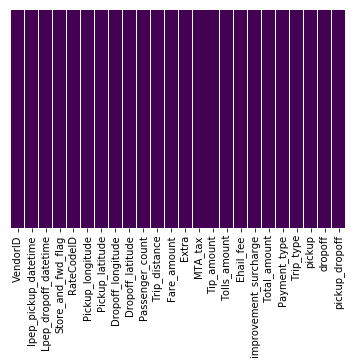

In [149]:
sb.heatmap(taxiDF_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [150]:
taxiDF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 24 columns):
VendorID                 1494926 non-null object
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null object
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null object
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null object
MTA_tax                  1494926 non-null object
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null object
Ehail_fee                1494926 non-null object
improvement_surcharge    1494926 non-null objec

In [44]:
from pyspark.sql.functions import collect_list

In [45]:
a = taxiDF.groupBy(taxiDF.lpep_pickup_datetime).agg(collect_list('pickup_dropoff'))

In [46]:
a.show()

+--------------------+----------------------------+
|lpep_pickup_datetime|collect_list(pickup_dropoff)|
+--------------------+----------------------------+
| 2015-09-01 00:01:29|                     [NY,NY]|
| 2015-09-01 01:01:10|                     [NJ,NJ]|
| 2015-09-01 01:10:49|                     [NY,NY]|
| 2015-09-01 01:11:51|                     [NJ,NJ]|
| 2015-09-01 01:41:19|                     [NY,NY]|
| 2015-09-01 02:21:28|                     [NJ,NJ]|
| 2015-09-01 03:08:09|                     [NY,NY]|
| 2015-09-01 03:15:07|                     [NY,NY]|
| 2015-09-01 03:16:33|                     [NY,NJ]|
| 2015-09-01 03:38:16|                     [NY,NY]|
| 2015-09-01 04:49:37|                     [NY,NJ]|
| 2015-09-01 05:04:06|                     [NJ,NY]|
| 2015-09-01 06:32:35|                     [NY,NJ]|
| 2015-09-01 07:03:20|                     [NJ,NJ]|
| 2015-09-01 07:04:07|              [NY,NY, NY,NY]|
| 2015-09-01 07:23:35|              [NJ,NJ, NY,NY]|
| 2015-09-01

In [117]:
# from pyspark.ml.fpm import FPGrowth


# fpGrowth = FPGrowth(itemsCol="Associates", minSupport=0.5, minConfidence=0.6)
# model = fpGrowth.fit(jointData)

# # Display frequent itemsets.
# model.freqItemsets.show()

# # Display generated association rules.
# model.associationRules.show()

# # transform examines the input items against all the association rules and summarize the
# # consequents as prediction
# model.transform(jointData).show()

In [35]:
# new_schema = ArrayType(StringType(), containsNull=True)
# from pyspark.sql.types import ArrayType
# udf_foo = udf(lambda x:x, new_schema)

In [33]:
# jointData.withColumn("Associates",udf_foo("Associates")).printSchema(5)

In [34]:
# data_FP = jointData.select("Associates")

In [32]:
# from pyspark.ml.fpm import FPGrowth


# fpGrowth = FPGrowth(itemsCol="Associates", minSupport=0.5, minConfidence=0.6)
# model = fpGrowth.fit(data_FP)

# # Display frequent itemsets.
# model.freqItemsets.show()

# # Display generated association rules.
# model.associationRules.show()

# # transform examines the input items against all the association rules and summarize the
# # consequents as prediction
# model.transform(jointData).show()

In [ ]:
# def NY_NJ(s):
#     t = s.split(",")
#     y = float(t[6])
#     x = float(t[5])
#     b = float(t[8])
#     a = float(t[7])
#     if y > 1.323942*x + 138.669195:
#         pickup = "NJ"
#     else:
#         pickup = "NYC"
#     if b > 1.323942*a + 138.669195:
#         dropoff= "NJ"
#     else:
#         dropoff = "NYC"
#     return pickup, dropoff

In [28]:
# df = df_with_test_column.withColumn('game_winner', when( (col("homeFinalRuns") > col("awayFinalRuns")), 
#                                                         col("homeFinalRuns") ))

In [29]:
# y > 1.323942 ∗ col('Pickup_longitude') + 138.669195

Since the Hudson River, which is the boundary of New Jersey and NYC in this area, is quite straight, we can use a line to model this natural boundary. The approximated line in latitude (y) and longitude (x) can be represented as
y = 1.323942 ∗ x + 138.669195.
If a location satisfies y > 1.323942 ∗ x + 138.669195, it?s in New Jersey. If a location satisfies y < 1.323942 ∗ x + 138.669195, it?s in Manhattan. After such processing, we can get Figure-2. In this way, we can better utilize the pick-up and drop-off latitude-longitude data.

In [47]:
df = ss.createDataFrame([
    (0, [1, 2, 5]),
    (1, [1, 2, 3, 5]),
    (2, [1, 2])
], ["id", "items"])

In [48]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- items: array (nullable = true)
 |    |-- element: long (containsNull = true)



In [49]:
from pyspark.ml.fpm import FPGrowth


fpGrowth = FPGrowth(itemsCol="items", minSupport=0.5, minConfidence=0.6)
model = fpGrowth.fit(df)

# Display frequent itemsets.
model.freqItemsets.show()

# Display generated association rules.
model.associationRules.show()

# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(df).show()

+---------+----+
|    items|freq|
+---------+----+
|      [1]|   3|
|      [2]|   3|
|   [2, 1]|   3|
|      [5]|   2|
|   [5, 2]|   2|
|[5, 2, 1]|   2|
|   [5, 1]|   2|
+---------+----+

+----------+----------+------------------+
|antecedent|consequent|        confidence|
+----------+----------+------------------+
|       [1]|       [2]|               1.0|
|       [1]|       [5]|0.6666666666666666|
|       [5]|       [2]|               1.0|
|       [5]|       [1]|               1.0|
|       [2]|       [1]|               1.0|
|       [2]|       [5]|0.6666666666666666|
|    [5, 2]|       [1]|               1.0|
|    [5, 1]|       [2]|               1.0|
|    [2, 1]|       [5]|0.6666666666666666|
+----------+----------+------------------+

+---+------------+----------+
| id|       items|prediction|
+---+------------+----------+
|  0|   [1, 2, 5]|        []|
|  1|[1, 2, 3, 5]|        []|
|  2|      [1, 2]|       [5]|
+---+------------+----------+



In [50]:
data = taxiDF.select('Pickup_longitude', 'Pickup_latitude')

In [51]:
data.show(2)

+----------------+---------------+
|Pickup_longitude|Pickup_latitude|
+----------------+---------------+
|      -73.979485|      40.684956|
|      -74.010796|      40.912216|
+----------------+---------------+
only showing top 2 rows



## Pickup Kmeans-clustering

In [157]:
#Step 1 - assemble your features
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=["Pickup_latitude","Pickup_longitude"], outputCol="features")
new_df1 = vecAssembler.transform(taxiDF)
new_df1.show()

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+-------+--------------+--------------------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|pickup|dropoff|pickup_dropoff|            features|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------

In [98]:
#Step 2 - fit your KMeans model
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=7, seed=1)  # 7 clusters here
model1 = kmeans.fit(new_df1.select('features'))

In [99]:
#Step 3 - transform your initial dataframe to include cluster assignments
transformed1 = model1.transform(new_df1)
transformed1.show() 

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+-------+--------------+--------------------+----------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|pickup|dropoff|pickup_dropoff|            features|prediction|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+

In [100]:
taxi_cluster1=transformed1.toPandas()

In [101]:
taxi_cluster1.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup,dropoff,pickup_dropoff,features,prediction
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,,0,9.75,1,2,NY,NY,"NY,NY","[40.68495559692383, -73.97948455810547]",3
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,,0,45.00,1,2,NJ,NJ,"NJ,NJ","[40.91221618652344, -74.01079559326172]",2
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,,0.3,5.80,1,1,NY,NY,"NY,NY","[40.76670837402344, -73.9214096069336]",5
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,,0.3,6.30,2,1,NY,NY,"NY,NY","[40.76667785644531, -73.92138671875]",5
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,,0.3,6.30,2,1,NY,NY,"NY,NY","[40.714046478271484, -73.95548248291016]",0


In [102]:
taxiDF.select('Pickup_longitude', 'Pickup_latitude').rdd.collect()

[Row(Pickup_longitude=-73.97948455810547, Pickup_latitude=40.68495559692383),
 Row(Pickup_longitude=-74.01079559326172, Pickup_latitude=40.91221618652344),
 Row(Pickup_longitude=-73.9214096069336, Pickup_latitude=40.76670837402344),
 Row(Pickup_longitude=-73.92138671875, Pickup_latitude=40.76667785644531),
 Row(Pickup_longitude=-73.95548248291016, Pickup_latitude=40.714046478271484),
 Row(Pickup_longitude=-73.94529724121094, Pickup_latitude=40.80818557739258),
 Row(Pickup_longitude=-73.89087677001953, Pickup_latitude=40.74642562866211),
 Row(Pickup_longitude=-73.94670104980469, Pickup_latitude=40.79732131958008),
 Row(Pickup_longitude=-73.96315002441406, Pickup_latitude=40.69382858276367),
 Row(Pickup_longitude=-73.89682006835938, Pickup_latitude=40.74612808227539),
 Row(Pickup_longitude=-73.82991790771484, Pickup_latitude=40.713768005371094),
 Row(Pickup_longitude=-73.9055404663086, Pickup_latitude=40.772525787353516),
 Row(Pickup_longitude=-73.941650390625, Pickup_latitude=40.8182945

In [103]:
taxiDF.select('Pickup_longitude', 'Pickup_latitude').rdd.map(lambda x: (x[0], x[1])).collect()

[(-73.97948455810547, 40.68495559692383),
 (-74.01079559326172, 40.91221618652344),
 (-73.9214096069336, 40.76670837402344),
 (-73.92138671875, 40.76667785644531),
 (-73.95548248291016, 40.714046478271484),
 (-73.94529724121094, 40.80818557739258),
 (-73.89087677001953, 40.74642562866211),
 (-73.94670104980469, 40.79732131958008),
 (-73.96315002441406, 40.69382858276367),
 (-73.89682006835938, 40.74612808227539),
 (-73.82991790771484, 40.713768005371094),
 (-73.9055404663086, 40.772525787353516),
 (-73.941650390625, 40.818294525146484),
 (-73.93252563476562, 40.85680389404297),
 (-73.95282745361328, 40.808353424072266),
 (-73.904052734375, 40.87870788574219),
 (-74.02134704589844, 40.647010803222656),
 (-73.95098876953125, 40.68049621582031),
 (-73.84967041015625, 40.72400665283203),
 (-73.9466781616211, 40.80628967285156),
 (-73.98682403564453, 40.702457427978516),
 (-73.91205596923828, 40.7754020690918),
 (-73.96174621582031, 40.71377944946289),
 (-73.94091033935547, 40.6986808776855

In [104]:
from pyspark.mllib.clustering import KMeans, KMeansModel
rdd = taxiDF.select('Pickup_latitude', 'Pickup_longitude').rdd.map(lambda x: (x[0], x[1]))
clusters = KMeans.train(rdd, 7, maxIterations=10, initializationMode="random") # works OK
clusters.centers

[array([ 40.65823302, -73.94500183]),
 array([0., 0.]),
 array([ 40.73771023, -73.8638988 ]),
 array([ 40.68564795, -73.98196903]),
 array([ 40.72688578, -73.94574486]),
 array([ 40.79989253, -73.94315008]),
 array([ 40.84693894, -73.90890188])]

In [162]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
feat_cols = ["Pickup_latitude","Pickup_longitude"]
vec_assembler = VectorAssembler(inputCols = feat_cols, outputCol='features')
final_data = vec_assembler.transform(taxiDF)

In [163]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

In [164]:
scalerModel = scaler.fit(final_data)
cluster_final_data = scalerModel.transform(final_data)
kmeans3 = KMeans(featuresCol='scaledFeatures',k=7)
kmeans2 = KMeans(featuresCol='scaledFeatures',k=6)

In [165]:
model_k3 = kmeans3.fit(cluster_final_data)
model_k2 = kmeans2.fit(cluster_final_data)
 
wssse_k3 = model_k3.computeCost(cluster_final_data)
wssse_k2 = model_k2.computeCost(cluster_final_data)
 
print("With K=3")
print("Within Set Sum of Squared Errors = " + str(wssse_k3))
print('--'*30)
print("With K=2")
print("Within Set Sum of Squared Errors = " + str(wssse_k2))

With K=3
Within Set Sum of Squared Errors = 300.379858453
------------------------------------------------------------
With K=2
Within Set Sum of Squared Errors = 343.533246437


In [167]:
## Checking the Elbow Point (WSSSE)
for k in range(2,9):
    kmeans = KMeans(featuresCol='scaledFeatures',k=k)
    model = kmeans.fit(cluster_final_data)
    wssse = model.computeCost(cluster_final_data)
    print("With K={}".format(k))
    print("Within Set Sum of Squared Errors = " + str(wssse))
    print('--'*30)

With K=2
Within Set Sum of Squared Errors = 2475.34018039
------------------------------------------------------------
With K=3
Within Set Sum of Squared Errors = 971.867829798
------------------------------------------------------------
With K=4
Within Set Sum of Squared Errors = 506.919892089
------------------------------------------------------------
With K=5
Within Set Sum of Squared Errors = 486.00544216
------------------------------------------------------------
With K=6
Within Set Sum of Squared Errors = 343.533246552
------------------------------------------------------------
With K=7
Within Set Sum of Squared Errors = 300.379858666
------------------------------------------------------------
With K=8
Within Set Sum of Squared Errors = 229.611871184
------------------------------------------------------------


In [168]:
model_k3.transform(cluster_final_data).groupBy('prediction').count().show()

+----------+------+
|prediction| count|
+----------+------+
|         1|  2110|
|         6|367518|
|         3|119647|
|         5|394510|
|         4| 31743|
|         2|378079|
|         0|201319|
+----------+------+



## Dropoff Kmeans-clustering

In [108]:
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=["Dropoff_latitude","Dropoff_longitude"], outputCol="features")
new_df2 = vecAssembler.transform(taxiDF)
new_df2.show()

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+-------+--------------+--------------------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|pickup|dropoff|pickup_dropoff|            features|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------

In [109]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=10, seed=1)  # 10 clusters here
model2 = kmeans.fit(new_df2.select('features'))

In [110]:
transformed2 = model2.transform(new_df2)
transformed2.show() 

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+-------+--------------+--------------------+----------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|pickup|dropoff|pickup_dropoff|            features|prediction|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+

In [111]:
taxi_cluster2=transformed2.toPandas()

In [112]:
taxi_cluster2.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup,dropoff,pickup_dropoff,features,prediction
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,,0,9.75,1,2,NY,NY,"NY,NY","[40.685020446777344, -73.97943115234375]",4
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,,0,45.00,1,2,NJ,NJ,"NJ,NJ","[40.91221237182617, -74.01078033447266]",7
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,,0.3,5.80,1,1,NY,NY,"NY,NY","[40.764686584472656, -73.91441345214844]",5
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,,0.3,6.30,2,1,NY,NY,"NY,NY","[40.771583557128906, -73.93142700195312]",5
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,,0.3,6.30,2,1,NY,NY,"NY,NY","[40.71472930908203, -73.94441223144531]",0


In [113]:
taxiDF.select("Dropoff_latitude","Dropoff_longitude").rdd.collect()

[Row(Dropoff_latitude=40.685020446777344, Dropoff_longitude=-73.97943115234375),
 Row(Dropoff_latitude=40.91221237182617, Dropoff_longitude=-74.01078033447266),
 Row(Dropoff_latitude=40.764686584472656, Dropoff_longitude=-73.91441345214844),
 Row(Dropoff_latitude=40.771583557128906, Dropoff_longitude=-73.93142700195312),
 Row(Dropoff_latitude=40.71472930908203, Dropoff_longitude=-73.94441223144531),
 Row(Dropoff_latitude=40.821197509765625, Dropoff_longitude=-73.93766784667969),
 Row(Dropoff_latitude=40.75630569458008, Dropoff_longitude=-73.87692260742188),
 Row(Dropoff_latitude=40.80451583862305, Dropoff_longitude=-73.9376449584961),
 Row(Dropoff_latitude=40.6805305480957, Dropoff_longitude=-73.956787109375),
 Row(Dropoff_latitude=40.752723693847656, Dropoff_longitude=-73.88862609863281),
 Row(Dropoff_latitude=40.70729064941406, Dropoff_longitude=-73.83494567871094),
 Row(Dropoff_latitude=40.76896286010742, Dropoff_longitude=-73.8953628540039),
 Row(Dropoff_latitude=40.82603073120117,

In [114]:
taxiDF.select("Dropoff_latitude","Dropoff_longitude").rdd.map(lambda x: (x[0], x[1])).collect()

[(40.685020446777344, -73.97943115234375),
 (40.91221237182617, -74.01078033447266),
 (40.764686584472656, -73.91441345214844),
 (40.771583557128906, -73.93142700195312),
 (40.71472930908203, -73.94441223144531),
 (40.821197509765625, -73.93766784667969),
 (40.75630569458008, -73.87692260742188),
 (40.80451583862305, -73.9376449584961),
 (40.6805305480957, -73.956787109375),
 (40.752723693847656, -73.88862609863281),
 (40.70729064941406, -73.83494567871094),
 (40.76896286010742, -73.8953628540039),
 (40.82603073120117, -73.950927734375),
 (40.856117248535156, -73.93136596679688),
 (40.80290985107422, -73.94914245605469),
 (40.90113067626953, -73.89696502685547),
 (40.65459442138672, -74.00405883789062),
 (40.69042205810547, -73.9539566040039),
 (40.70719909667969, -73.83512878417969),
 (40.799251556396484, -73.93624877929688),
 (40.692901611328125, -73.97278594970703),
 (40.76850509643555, -73.89364624023438),
 (40.718048095703125, -73.98593139648438),
 (40.6828498840332, -73.941078186

In [15]:
from pyspark.mllib.clustering import KMeans, KMeansModel

rdd = taxiDF.select("Dropoff_latitude","Dropoff_longitude").rdd.map(lambda x: (x[0], x[1]))
clusters = KMeans.train(rdd, 10, maxIterations=10, initializationMode="random") # works OK
clusters.centers

[array([ 40.76134118, -73.97007921]),
 array([ 40.66143498, -73.94129176]),
 array([ 40.85138855, -73.89797314]),
 array([ 40.70957988, -73.94302468]),
 array([ 40.6645498 , -73.99185017]),
 array([ 40.75244497, -73.88501148]),
 array([ 40.80663567, -73.94632565]),
 array([ 40.69893793, -73.80437661]),
 array([ 40.70517985, -73.98836901]),
 array([0., 0.])]

## Correlation

In [116]:
taxiDF.columns

['VendorID',
 'lpep_pickup_datetime',
 'Lpep_dropoff_datetime',
 'Store_and_fwd_flag',
 'RateCodeID',
 'Pickup_longitude',
 'Pickup_latitude',
 'Dropoff_longitude',
 'Dropoff_latitude',
 'Passenger_count',
 'Trip_distance',
 'Fare_amount',
 'Extra',
 'MTA_tax',
 'Tip_amount',
 'Tolls_amount',
 'Ehail_fee',
 'improvement_surcharge',
 'Total_amount',
 'Payment_type',
 'Trip_type',
 'pickup',
 'dropoff',
 'pickup_dropoff']

In [117]:
from pyspark.sql.functions import corr
taxiDF.select(corr("Tolls_amount","Tip_amount")).show()

+------------------------------+
|corr(Tolls_amount, Tip_amount)|
+------------------------------+
|           0.18942485489026545|
+------------------------------+



In [118]:
from pyspark.sql.functions import corr
taxiDF.select(corr("Total_amount","Tip_amount")).show()

+------------------------------+
|corr(Total_amount, Tip_amount)|
+------------------------------+
|             0.573374634255444|
+------------------------------+



In [119]:
from pyspark.sql.functions import corr
taxiDF.select(corr("Total_amount","Tip_amount")).show()

+------------------------------+
|corr(Total_amount, Tip_amount)|
+------------------------------+
|            0.5733746342554442|
+------------------------------+



In [176]:
from pyspark.sql.functions import corr
taxiDF.select(corr("Total_amount","Trip_distance")).show()

+---------------------------------+
|corr(Total_amount, Trip_distance)|
+---------------------------------+
|               0.8401730414536295|
+---------------------------------+



In [177]:
from pyspark.sql.functions import corr
taxiDF.select(corr("Passenger_count","Trip_distance")).show()

+------------------------------------+
|corr(Passenger_count, Trip_distance)|
+------------------------------------+
|                0.012148180652814719|
+------------------------------------+



In [133]:
# from pyspark.ml.stat import ChiSquareTest
# r = ChiSquareTest.test(taxiDF, "Store_and_fwd_flag", "RateCodeID").head()
# print("pValues: " + str(r.pValues))
# print("degreesOfFreedom: " + str(r.degreesOfFreedom))
# print("statistics: " + str(r.statistics))

In [52]:
# Import relevant libraries
from pyspark.sql.functions import dayofmonth,hour,dayofyear,weekofyear,month,year,format_number,date_format,mean, date_format, datediff, to_date, lit

In [53]:
new_taxiDF = taxiDF.withColumn('pickup_year', year(taxiDF['lpep_pickup_datetime']))

In [54]:
new_taxiDF = new_taxiDF.withColumn('pickup_month', month(taxiDF['lpep_pickup_datetime']))

In [55]:
new_taxiDF = new_taxiDF.withColumn('pickup_hour', hour(taxiDF['lpep_pickup_datetime']))
new_taxiDF.show()

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+-------+--------------+-----------+------------+-----------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|pickup|dropoff|pickup_dropoff|pickup_year|pickup_month|pickup_hour|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+---

In [56]:
new_taxiDF = new_taxiDF.withColumn('dropoff_year', year(taxiDF['Lpep_dropoff_datetime']))

In [57]:
new_taxiDF = new_taxiDF.withColumn('dropoff_month', month(taxiDF['Lpep_dropoff_datetime']))

In [58]:
new_taxiDF = new_taxiDF.withColumn('dropoff_hour', hour(taxiDF['Lpep_dropoff_datetime']))
new_taxiDF.show()

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+-------+--------------+-----------+------------+-----------+------------+-------------+------------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|pickup|dropoff|pickup_dropoff|pickup_year|pickup_month|pickup_hour|dropoff_year|dropoff_month|dropoff_hour|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----

In [59]:
new_taxiDF.groupBy("pickup_year").count().show()

+-----------+-------+
|pickup_year|  count|
+-----------+-------+
|       2015|1494926|
+-----------+-------+



In [60]:
new_taxiDF.groupBy("pickup_month").count().show()

+------------+-------+
|pickup_month|  count|
+------------+-------+
|           9|1494926|
+------------+-------+



In [61]:
from pyspark.sql.functions import desc, asc

In [153]:
new_taxiDF.groupBy("pickup_hour").count().sort(asc("pickup_hour")).show(25)

+-----------+-----+
|pickup_hour|count|
+-----------+-----+
|          0|67158|
|          1|53773|
|          2|41196|
|          3|31640|
|          4|26424|
|          5|16700|
|          6|22667|
|          7|41978|
|          8|58965|
|          9|62027|
|         10|57468|
|         11|56791|
|         12|57828|
|         13|57477|
|         14|66664|
|         15|73777|
|         16|79157|
|         17|88022|
|         18|97245|
|         19|96141|
|         20|90785|
|         21|86543|
|         22|84705|
|         23|79795|
+-----------+-----+



In [174]:
pickupHour = new_taxiDF.groupBy("pickup_hour").count().sort(asc("pickup_hour"))

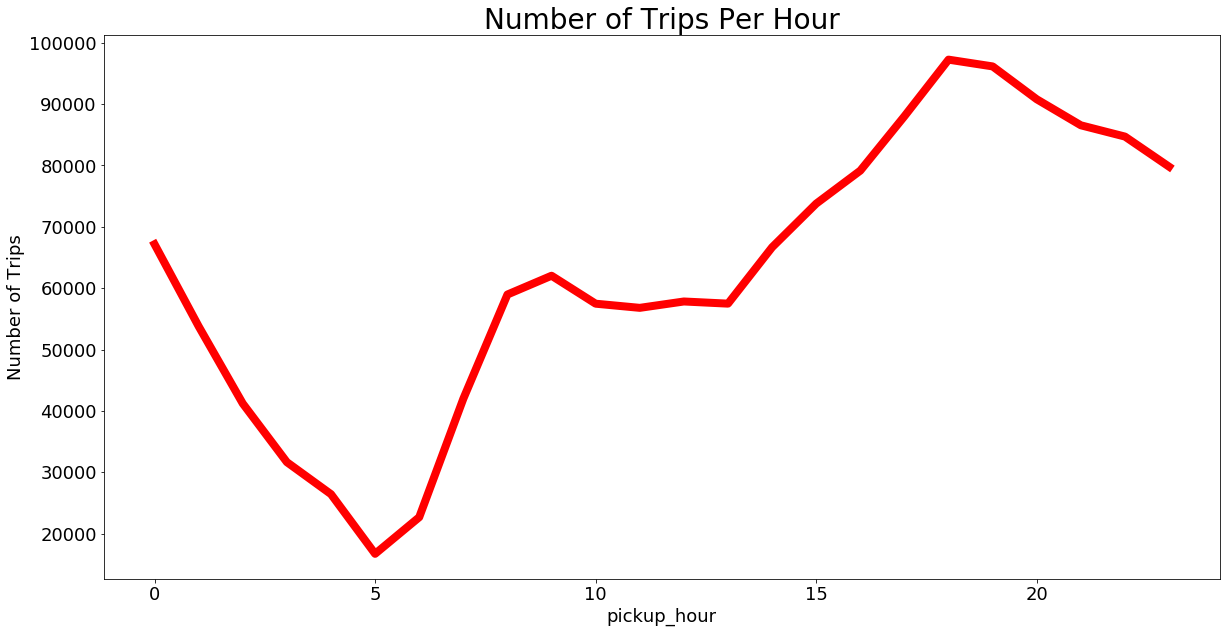

In [175]:
import pandas as pd
pickupHour = pickupHour.collect()

hours = [item[0] for item in pickupHour]

count = [item[1] for item in pickupHour]

trips_per_hour = {"hour":hours, "trip_count": count}
trips_per_hour = pd.DataFrame(trips_per_hour)


#trips_per_hour = trips_per_hour.sort_values(by = "hour")

trips_per_hour.plot(figsize = (20,10), kind = "line", x = "hour", y = "trip_count", 
                      color = "red", linewidth = 8, legend = False)

plt.xlabel("pickup_hour", fontsize = 18)
plt.ylabel("Number of Trips", fontsize = 18)
plt.title("Number of Trips Per Hour", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [177]:
pickup_dropoff_location  = new_taxiDF.groupBy("pickup_dropoff").count().collect()
location = [item[0] for item in pickup_dropoff_location]
count = [item[1] for item in pickup_dropoff_location]
pickup_dropoff_location = {"location" : location, "count": count}
pickup_dropoff_location = pd.DataFrame(pickup_dropoff_location)
pickup_dropoff_location = pickup_dropoff_location.sort_values(by = "count", ascending  = False)
pickup_dropoff_location.iloc[:5]

,count,location
2,864553,"NY,NY"
0,449130,"NJ,NJ"
3,144110,"NY,NJ"
1,37133,"NJ,NY"


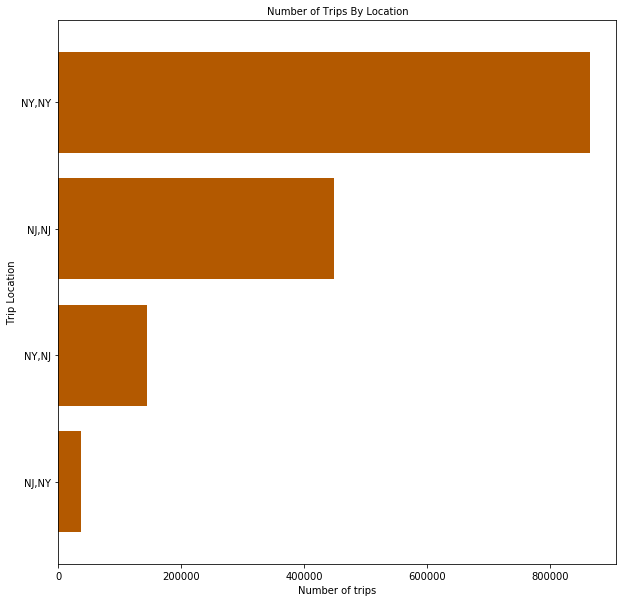

In [180]:
pickup_dropoff_location = pickup_dropoff_location.iloc[:20]

myplot = pickup_dropoff_location.plot(figsize = (10,10), kind = "barh", color = "#b35900", width = 0.8,
                               x = "location", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Number of trips", fontsize = 10)
plt.ylabel("Trip Location", fontsize = 10)
plt.title("Number of Trips By Location", fontsize = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [182]:
import seaborn as sns

In [198]:
# Import relevant libraries
from pyspark.sql.functions import dayofmonth,hour,dayofyear,weekofyear,month,year,format_number,date_format,mean, date_format, datediff, to_date, lit
new_taxiDF_day = new_taxiDF.withColumn('pickup_day', dayofmonth(taxiDF['lpep_pickup_datetime']))

In [203]:
#temp = new_taxiDF.filter(new_taxiDF["pickup_dropoff"] == "NJ,NJ")
temp = new_taxiDF_day.select("pickup_day", new_taxiDF['pickup_hour'].cast('int').alias('pickup_hour'))
hourlyCount  = temp.groupBy(["pickup_day","pickup_hour"]).count().collect()

months = [item[0] for item in hourlyCount]
hours = [item[1] for item in hourlyCount]
count = [item[2] for item in hourlyCount]

trip_byHour = {"count": count, "hours": hours, "days": months}
trip_byHour = pd.DataFrame(trip_byHour)
trip_byHour = trip_byHour.sort_values(by = "hours", ascending  = True)

/usr/local/lib/python2.7/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


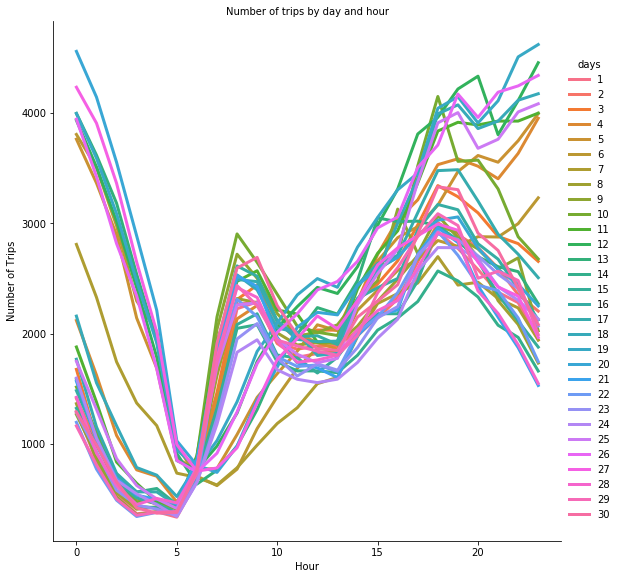

In [207]:
import seaborn as sns

g = sns.FacetGrid(trip_byHour, hue="days", size = 8)
g.map(plt.plot, "hours", "count", linewidth = 3)
g.add_legend()

plt.ylabel("Number of Trips", fontsize = 10)
plt.xlabel("Hour", fontsize = 10)
plt.title("Number of trips by day and hour", fontsize = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [63]:
new_taxiDF.columns

['VendorID',
 'lpep_pickup_datetime',
 'Lpep_dropoff_datetime',
 'Store_and_fwd_flag',
 'RateCodeID',
 'Pickup_longitude',
 'Pickup_latitude',
 'Dropoff_longitude',
 'Dropoff_latitude',
 'Passenger_count',
 'Trip_distance',
 'Fare_amount',
 'Extra',
 'MTA_tax',
 'Tip_amount',
 'Tolls_amount',
 'Ehail_fee',
 'improvement_surcharge',
 'Total_amount',
 'Payment_type',
 'Trip_type',
 'pickup',
 'dropoff',
 'pickup_dropoff',
 'pickup_year',
 'pickup_month',
 'pickup_hour',
 'dropoff_year',
 'dropoff_month',
 'dropoff_hour']

In [64]:
from pyspark.sql import functions as F
new_taxiDF.groupBy('pickup_hour')\
       .agg({'Fare_amount':'mean',
             'Trip_distance': 'mean',
             'Tip_amount': 'mean',
             'Tolls_amount': 'mean'} )\
        .sort(F.col('pickup_hour')).show(24)

+-----------+------------------+-------------------+------------------+------------------+
|pickup_hour|avg(Trip_distance)|  avg(Tolls_amount)|   avg(Tip_amount)|  avg(Fare_amount)|
+-----------+------------------+-------------------+------------------+------------------+
|          0|3.1152760650804887|0.08623812501861271|1.2605813150662033| 12.43359004131661|
|          1|3.0173471815562456|0.07366057315009389| 1.189363248402435|11.971902255588367|
|          2|3.0461755996136928| 0.0704859695116031|1.1496929304803762|11.994295562742588|
|          3|3.2129453213325574|0.08399336283185846| 1.089770858961613|12.402056889849987|
|          4| 3.526555027682805| 0.1368066908870725|1.0588022244240116|13.276886920775551|
|          5| 4.133474252020751|0.24258143712574864|1.4148107784897268|14.848548503121483|
|          6|4.0551488950255115|0.26882781135571493|1.5793519206599822|14.846629460711561|
|          7|3.2843944444355926|0.22359069036161724|1.4113588065706877|13.469711277256744|

In [65]:
new_taxiDF.filter(taxiDF.pickup_dropoff=='NJ,NJ').groupBy('pickup_hour')\
       .agg({'Fare_amount':'mean',
             'Trip_distance': 'mean',
             'Tip_amount': 'mean',
             'Tolls_amount': 'mean'} )\
        .sort(F.col('pickup_hour')).show(24)

+-----------+------------------+--------------------+------------------+------------------+
|pickup_hour|avg(Trip_distance)|   avg(Tolls_amount)|   avg(Tip_amount)|  avg(Fare_amount)|
+-----------+------------------+--------------------+------------------+------------------+
|          0|2.4173714659818515| 0.02678073820581765|0.7745335282516416| 10.31344414576703|
|          1|2.3005345913664206| 0.03234567901234568|0.7351257859657857| 9.797075471298232|
|          2|2.2865579457010616| 0.02452290076335878|0.6651197079870278| 9.765353922370892|
|          3|2.2747726116080953|0.040189489641232944|0.6507200600288549| 9.849729661093276|
|          4| 2.591633255412815|0.036518278301886795| 0.681276533314475|10.399767098691916|
|          5|2.8801581626621795|0.024753804834377793|0.9029185311239012|11.244947775871548|
|          6|2.8507373807097363|0.027243690851735013|0.9772752356697383|11.263015246933442|
|          7| 2.357263417894472|0.021114307081631485| 0.910346890566375|10.73171

In [66]:
new_taxiDF.filter(taxiDF.pickup_dropoff=='NY,NY').groupBy('pickup_hour')\
       .agg({'Fare_amount':'mean',
             'Trip_distance': 'mean',
             'Tip_amount': 'mean',
             'Tolls_amount': 'mean'} )\
        .sort(F.col('pickup_hour')).show(24)

+-----------+------------------+--------------------+------------------+------------------+
|pickup_hour|avg(Trip_distance)|   avg(Tolls_amount)|   avg(Tip_amount)|  avg(Fare_amount)|
+-----------+------------------+--------------------+------------------+------------------+
|          0|2.7157663431381898|0.011063400823610159| 1.148821636087433|11.185673472751187|
|          1| 2.644842194867906|0.008395326595497197| 1.080727116638767|10.877443327039606|
|          2|2.6890133877640507| 0.01469966283675407|1.0468846760014516| 10.96599430403762|
|          3| 2.800595368540993| 0.01361515789473684|0.9765052623297823|11.289694736767128|
|          4|3.0918459419645146|0.018764754182489997|0.9178769361224118|12.129170686416144|
|          5|3.6324968100400623|0.025491408934707905|1.1974835541386433|13.507237114330454|
|          6|3.7691926078626286|0.028217898832684822|1.4601264588157954|14.177442606337955|
|          7|3.0126805204934435|0.028006537855349952|1.2482873144759135| 12.5374

In [67]:
new_taxiDF.filter(taxiDF.pickup_dropoff=='NJ,NY').groupBy('pickup_hour')\
       .agg({'Fare_amount':'mean',
             'Trip_distance': 'mean',
             'Tip_amount': 'mean',
             'Tolls_amount': 'mean'} )\
        .sort(F.col('pickup_hour')).show(24)

+-----------+------------------+------------------+------------------+------------------+
|pickup_hour|avg(Trip_distance)| avg(Tolls_amount)|   avg(Tip_amount)|  avg(Fare_amount)|
+-----------+------------------+------------------+------------------+------------------+
|          0| 6.979108108016285|0.8782027027027025|1.6564932416168017| 22.77790540553428|
|          1| 6.897852531070328|0.8803041474654378| 1.593428568564321| 21.68237788019367|
|          2| 7.261721867007136|0.9022781456953646|1.5785960238870997|22.574834437086093|
|          3| 9.312973410787835|1.5875044247787615|1.7801946895246485| 25.06490265162645|
|          4| 8.539227202477099|2.3783462132921165| 2.391823799414143|25.908748066591148|
|          5| 9.701781193188916|3.0271528751753163|3.4748807837180844| 28.79948105885638|
|          6|  9.39161866775676|2.7559384309831207|3.0479940394163427| 28.21997020308524|
|          7| 7.957567563161232| 2.351102418207683| 2.756059744172752|25.193812233285918|
|         

In [68]:
new_taxiDF.filter(taxiDF.pickup_dropoff=='NY,NJ').groupBy('pickup_hour')\
       .agg({'Fare_amount':'mean',
             'Trip_distance': 'mean',
             'Tip_amount': 'mean',
             'Tolls_amount': 'mean'} )\
        .sort(F.col('pickup_hour')).show(24)

+-----------+------------------+------------------+------------------+------------------+
|pickup_hour|avg(Trip_distance)| avg(Tolls_amount)|   avg(Tip_amount)|  avg(Fare_amount)|
+-----------+------------------+------------------+------------------+------------------+
|          0| 6.282014451311183|0.5378764194071669|2.8222975971759827|  22.5934227989972|
|          1| 6.037717452130366|0.4438245614035091| 2.604779316665861|21.293883656508815|
|          2|  5.97898740558876|0.3953754844961241| 2.508691860956696| 20.78133236437805|
|          3|6.2007929879042365|0.3796198396198396|2.2889783189894497|  21.1238283337862|
|          4| 6.423690936187293|0.5473163159710245|2.1502725083391216| 21.53862366375326|
|          5| 6.308959610225965|0.6324643002855975| 2.418482254299946|21.290779274077085|
|          6|5.8390747624190675|0.7478632025450697| 2.726572109837172|20.328183987173464|
|          7| 5.628496204172967|0.8638874215912834| 2.998024100184099|21.241541762681006|
|         

In [69]:
new_taxiDF.columns

['VendorID',
 'lpep_pickup_datetime',
 'Lpep_dropoff_datetime',
 'Store_and_fwd_flag',
 'RateCodeID',
 'Pickup_longitude',
 'Pickup_latitude',
 'Dropoff_longitude',
 'Dropoff_latitude',
 'Passenger_count',
 'Trip_distance',
 'Fare_amount',
 'Extra',
 'MTA_tax',
 'Tip_amount',
 'Tolls_amount',
 'Ehail_fee',
 'improvement_surcharge',
 'Total_amount',
 'Payment_type',
 'Trip_type',
 'pickup',
 'dropoff',
 'pickup_dropoff',
 'pickup_year',
 'pickup_month',
 'pickup_hour',
 'dropoff_year',
 'dropoff_month',
 'dropoff_hour']

In [70]:
# from pyspark.sql.functions import col, column, split
# new_taxiDF_ = new_taxiDF_.withColumn("Associate", split(col("Associate"), ",").cast("array<long>"))

In [87]:
# new_taxiDF_ = new_taxiDF.withColumn('Associate', 
#                     F.concat(F.col('Trip_distance'),F.lit(', '), F.col('Fare_amount')))
# new_taxiDF_.show()

In [122]:
from pyspark.sql.functions import array
#import org.apache.spark.sql.functions.array
new_taxiDF_ = new_taxiDF_20.withColumn("Associate", array("VendorID", "Store_and_fwd_flag", "RateCodeID",\
                                                      "Passenger_count","Trip_distance","Fare_amount",\
                                                         "Extra","MTA_tax","Tip_amount","Tolls_amount",\
                                                         "improvement_surcharge","Total_amount","Payment_type",\
                                                         "Trip_type","pickup_year","pickup_month","pickup_hour",\
                                                         "dropoff_year","dropoff_month","dropoff_hour"))

In [99]:
#new_taxiDF_ = new_taxiDF.withColumn('Trip_distance',F.concat(F.col('Trip_distance'),F.lit('_Trip_distance'))

In [113]:
from pyspark.sql.functions import array
new_taxiDF_1 = new_taxiDF.withColumn("VendorID", F.concat(F.lit("VendorID_"), col("VendorID")))
new_taxiDF_2 = new_taxiDF_1.withColumn("Store_and_fwd_flag", F.concat(F.lit("Store_and_fwd_flag_"), col("Store_and_fwd_flag")))
new_taxiDF_3 = new_taxiDF_2.withColumn("RateCodeID", F.concat(F.lit("RateCodeID_"), col("RateCodeID")))
new_taxiDF_4 = new_taxiDF_3.withColumn("Passenger_count", F.concat(F.lit("Passenger_count_"), col("Passenger_count")))
new_taxiDF_5 = new_taxiDF_4.withColumn("Trip_distance", F.concat(F.lit("Trip_distance_"), col("Trip_distance")))
new_taxiDF_6 = new_taxiDF_5.withColumn("Fare_amount", F.concat(F.lit("Fare_amount_"), col("Fare_amount")))
new_taxiDF_7 = new_taxiDF_6.withColumn("Extra", F.concat(F.lit("Extra_"), col("Extra")))
new_taxiDF_8 = new_taxiDF_7.withColumn("MTA_tax", F.concat(F.lit("MTA_tax_"), col("MTA_tax")))
new_taxiDF_9 = new_taxiDF_8.withColumn("Tip_amount", F.concat(F.lit("Tip_amount_"), col("Tip_amount")))
new_taxiDF_10 = new_taxiDF_9.withColumn("Tolls_amount", F.concat(F.lit("Tolls_amount_"), col("Tolls_amount")))
new_taxiDF_11 = new_taxiDF_10.withColumn("improvement_surcharge", F.concat(F.lit("improvement_surcharge_"), col("improvement_surcharge")))
new_taxiDF_12 = new_taxiDF_11.withColumn("Total_amount", F.concat(F.lit("Total_amount_"), col("Total_amount")))
new_taxiDF_13 = new_taxiDF_12.withColumn("Payment_type", F.concat(F.lit("Payment_type_"), col("Payment_type")))
new_taxiDF_14 = new_taxiDF_13.withColumn("Trip_type", F.concat(F.lit("Trip_type_"), col("Trip_type")))
new_taxiDF_15 = new_taxiDF_14.withColumn("pickup_year", F.concat(F.lit("pickup_year_"), col("pickup_year")))
new_taxiDF_16 = new_taxiDF_15.withColumn("pickup_month", F.concat(F.lit("pickup_month_"), col("pickup_month")))
new_taxiDF_17 = new_taxiDF_16.withColumn("pickup_hour", F.concat(F.lit("pickup_hour_"), col("pickup_hour")))
new_taxiDF_18 = new_taxiDF_17.withColumn("dropoff_year", F.concat(F.lit("dropoff_year_"), col("dropoff_year")))
new_taxiDF_19 = new_taxiDF_18.withColumn("dropoff_month", F.concat(F.lit("dropoff_month_"), col("dropoff_month")))
new_taxiDF_20 = new_taxiDF_19.withColumn("dropoff_hour", F.concat(F.lit("dropoff_hour_"), col("dropoff_hour")))

In [117]:
#new_taxiDF_20.show()

In [123]:
new_taxiDF_.printSchema()

root
 |-- VendorID: string (nullable = true)
 |-- lpep_pickup_datetime: string (nullable = true)
 |-- Lpep_dropoff_datetime: string (nullable = true)
 |-- Store_and_fwd_flag: string (nullable = true)
 |-- RateCodeID: string (nullable = true)
 |-- Pickup_longitude: float (nullable = true)
 |-- Pickup_latitude: float (nullable = true)
 |-- Dropoff_longitude: float (nullable = true)
 |-- Dropoff_latitude: float (nullable = true)
 |-- Passenger_count: string (nullable = true)
 |-- Trip_distance: string (nullable = true)
 |-- Fare_amount: string (nullable = true)
 |-- Extra: string (nullable = true)
 |-- MTA_tax: string (nullable = true)
 |-- Tip_amount: string (nullable = true)
 |-- Tolls_amount: string (nullable = true)
 |-- Ehail_fee: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- Total_amount: string (nullable = true)
 |-- Payment_type: string (nullable = true)
 |-- Trip_type: string (nullable = true)
 |-- pickup: string (nullable = false)
 |-- dropof

In [107]:
#new_taxiDF_.show()

In [92]:
# from pyspark.sql.types import ArrayType, FloatType, StringType

# label_udf = udf(my_udf, ArrayType(StringType()))
# df_subsets_concat_with_md = df_subsets_concat.withColumn('Associate', label_udf(df_subsets_concat.col1))

In [124]:
new_taxiDF_.select('Associate').show()

+--------------------+
|           Associate|
+--------------------+
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
|[VendorID_2, Stor...|
+--------------------+
only showing top 20 rows



In [125]:
fpGrowth = FPGrowth(itemsCol="Associate", minSupport=0.9, minConfidence=0.9)
model = fpGrowth.fit(new_taxiDF_)

# Display frequent itemsets.
model.freqItemsets.show()

# Display generated association rules.
model.associationRules.show()

# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(new_taxiDF_).show()

+--------------------+-------+
|               items|   freq|
+--------------------+-------+
|       [MTA_tax_0.5]|1457171|
|[MTA_tax_0.5, pic...|1457171|
|[MTA_tax_0.5, pic...|1457171|
|[MTA_tax_0.5, pic...|1457171|
|[MTA_tax_0.5, pic...|1457171|
|[MTA_tax_0.5, Tol...|1426480|
|[MTA_tax_0.5, Tol...|1426480|
|[MTA_tax_0.5, Tol...|1426480|
|[MTA_tax_0.5, Tol...|1426480|
|[MTA_tax_0.5, Tol...|1426480|
|[MTA_tax_0.5, Tol...|1418272|
|[MTA_tax_0.5, Tol...|1418272|
|[MTA_tax_0.5, Tol...|1418272|
|[MTA_tax_0.5, Tol...|1418272|
|[MTA_tax_0.5, Tol...|1418272|
|[MTA_tax_0.5, Tol...|1418272|
|[MTA_tax_0.5, Tol...|1418272|
|[MTA_tax_0.5, Tol...|1417701|
|[MTA_tax_0.5, Tol...|1417701|
|[MTA_tax_0.5, Tol...|1417701|
+--------------------+-------+
only showing top 20 rows

+--------------------+--------------------+------------------+
|          antecedent|          consequent|        confidence|
+--------------------+--------------------+------------------+
|[RateCodeID_1, Tr...|       [MTA_tax_0.5

In [78]:
# from pyspark.sql.functions import col , column
# new_taxiDF_ = new_taxiDF_.withColumn("Associate", col("Associate").cast("array"))

In [136]:
new_taxiDF_NJ = new_taxiDF_.filter(new_taxiDF_.pickup_dropoff=='NJ,NJ').select('Associate')

In [137]:
fpGrowth = FPGrowth(itemsCol="Associate", minSupport=0.9, minConfidence=0.9)
model = fpGrowth.fit(new_taxiDF_NJ)

# Display frequent itemsets.
model.freqItemsets.show()

# Display generated association rules.
model.associationRules.show()

# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(new_taxiDF_NJ).show()

+--------------------+------+
|               items|  freq|
+--------------------+------+
|      [RateCodeID_1]|434801|
|[RateCodeID_1, pi...|434801|
|[RateCodeID_1, pi...|434801|
|[RateCodeID_1, pi...|434801|
|[RateCodeID_1, pi...|434801|
|[RateCodeID_1, St...|432163|
|[RateCodeID_1, St...|432163|
|[RateCodeID_1, St...|432163|
|[RateCodeID_1, St...|432163|
|[RateCodeID_1, St...|432163|
|[RateCodeID_1, St...|430828|
|[RateCodeID_1, St...|430828|
|[RateCodeID_1, St...|430828|
|[RateCodeID_1, St...|430828|
|[RateCodeID_1, St...|430828|
|[RateCodeID_1, St...|430828|
|[RateCodeID_1, St...|430828|
|[RateCodeID_1, St...|430704|
|[RateCodeID_1, St...|430704|
|[RateCodeID_1, St...|430704|
+--------------------+------+
only showing top 20 rows

+--------------------+--------------------+------------------+
|          antecedent|          consequent|        confidence|
+--------------------+--------------------+------------------+
|[MTA_tax_0.5, Rat...|[improvement_surc...|0.9996081956256194|
|[

In [138]:
new_taxiDF_NY = new_taxiDF_.filter(new_taxiDF_.pickup_dropoff=='NY,NY').select('Associate')

In [139]:
fpGrowth = FPGrowth(itemsCol="Associate", minSupport=0.9, minConfidence=0.9)
model = fpGrowth.fit(new_taxiDF_NY)

# Display frequent itemsets.
model.freqItemsets.show()

# Display generated association rules.
model.associationRules.show()

# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(new_taxiDF_NY).show()

+--------------------+------+
|               items|  freq|
+--------------------+------+
|[improvement_surc...|847691|
|[improvement_surc...|847691|
|[improvement_surc...|847691|
|[improvement_surc...|847691|
|[improvement_surc...|847691|
|[improvement_surc...|843070|
|[improvement_surc...|843070|
|[improvement_surc...|843070|
|[improvement_surc...|843070|
|[improvement_surc...|843070|
|[improvement_surc...|840834|
|[improvement_surc...|840834|
|[improvement_surc...|840834|
|[improvement_surc...|840834|
|[improvement_surc...|840834|
|[improvement_surc...|840834|
|[improvement_surc...|840834|
|[improvement_surc...|840480|
|[improvement_surc...|840480|
|[improvement_surc...|840480|
+--------------------+------+
only showing top 20 rows

+--------------------+--------------------+------------------+
|          antecedent|          consequent|        confidence|
+--------------------+--------------------+------------------+
|[improvement_surc...|      [RateCodeID_1]|0.9963621051632723|
|[

In [140]:
new_taxiDF_NJNY = new_taxiDF_.filter(new_taxiDF_.pickup_dropoff=='NJ,NY').select('Associate')

In [142]:
fpGrowth = FPGrowth(itemsCol="Associate", minSupport=0.9, minConfidence=0.9)
model = fpGrowth.fit(new_taxiDF_NJNY)

# Display frequent itemsets.
model.freqItemsets.show()

# Display generated association rules.
model.associationRules.show()

# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(new_taxiDF_NJNY).show()

+--------------------+-----+
|               items| freq|
+--------------------+-----+
|  [pickup_year_2015]|37133|
| [dropoff_year_2015]|37133|
|[dropoff_year_201...|37133|
|    [pickup_month_9]|37133|
|[pickup_month_9, ...|37133|
|[pickup_month_9, ...|37133|
|[pickup_month_9, ...|37133|
|   [dropoff_month_9]|37101|
|[dropoff_month_9,...|37101|
|[dropoff_month_9,...|37101|
|[dropoff_month_9,...|37101|
|[dropoff_month_9,...|37101|
|[dropoff_month_9,...|37101|
|[dropoff_month_9,...|37101|
|[dropoff_month_9,...|37101|
|[Store_and_fwd_fl...|36754|
|[Store_and_fwd_fl...|36754|
|[Store_and_fwd_fl...|36754|
|[Store_and_fwd_fl...|36754|
|[Store_and_fwd_fl...|36754|
+--------------------+-----+
only showing top 20 rows

+--------------------+--------------------+------------------+
|          antecedent|          consequent|        confidence|
+--------------------+--------------------+------------------+
|[Store_and_fwd_fl...|    [pickup_month_9]|               1.0|
|[Store_and_fwd_fl...|  [p

In [143]:
new_taxiDF_NYNJ = new_taxiDF_.filter(new_taxiDF_.pickup_dropoff=='NY,NJ').select('Associate')

In [144]:
fpGrowth = FPGrowth(itemsCol="Associate", minSupport=0.9, minConfidence=0.9)
model = fpGrowth.fit(new_taxiDF_NYNJ)

# Display frequent itemsets.
model.freqItemsets.show()

# Display generated association rules.
model.associationRules.show()

# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(new_taxiDF_NYNJ).show()

+--------------------+------+
|               items|  freq|
+--------------------+------+
|      [RateCodeID_1]|139803|
|[RateCodeID_1, pi...|139803|
|[RateCodeID_1, pi...|139803|
|[RateCodeID_1, pi...|139803|
|[RateCodeID_1, pi...|139803|
|[RateCodeID_1, Tr...|139752|
|[RateCodeID_1, Tr...|139752|
|[RateCodeID_1, Tr...|139752|
|[RateCodeID_1, Tr...|139752|
|[RateCodeID_1, Tr...|139752|
|[RateCodeID_1, Tr...|139000|
|[RateCodeID_1, Tr...|139000|
|[RateCodeID_1, Tr...|139000|
|[RateCodeID_1, Tr...|139000|
|[RateCodeID_1, Tr...|139000|
|[RateCodeID_1, Tr...|139000|
|[RateCodeID_1, Tr...|139000|
|[RateCodeID_1, Tr...|138920|
|[RateCodeID_1, Tr...|138920|
|[RateCodeID_1, Tr...|138920|
+--------------------+------+
only showing top 20 rows

+--------------------+--------------------+------------------+
|          antecedent|          consequent|        confidence|
+--------------------+--------------------+------------------+
|[Trip_type_1, Sto...|      [RateCodeID_1]|0.9962922323343159|
|[

In [154]:
new_taxiDF.columns

['VendorID',
 'lpep_pickup_datetime',
 'Lpep_dropoff_datetime',
 'Store_and_fwd_flag',
 'RateCodeID',
 'Pickup_longitude',
 'Pickup_latitude',
 'Dropoff_longitude',
 'Dropoff_latitude',
 'Passenger_count',
 'Trip_distance',
 'Fare_amount',
 'Extra',
 'MTA_tax',
 'Tip_amount',
 'Tolls_amount',
 'Ehail_fee',
 'improvement_surcharge',
 'Total_amount',
 'Payment_type',
 'Trip_type',
 'pickup',
 'dropoff',
 'pickup_dropoff',
 'pickup_year',
 'pickup_month',
 'pickup_hour',
 'dropoff_year',
 'dropoff_month',
 'dropoff_hour']

### Comparison with part1
The dataframe is easier to handle the variables and actually execute the codes by using the above code only. It is simply and easy to do analysis about data as well as large data set

In [8]:
from pyspark.sql.functions import col, when

In [9]:
def NY_NJ(s):
    t = s.split(",")
    y = float(t[6])
    x = float(t[5])
    b = float(t[8])
    a = float(t[7])
    if y > 1.323942*x + 138.669195:
        pickup = "0"
    else:
        pickup = "1"
    if b > 1.323942*a + 138.669195:
        dropoff= "0"
    else:
        dropoff = "1"
    return (pickup, dropoff)

In [10]:
pickAndDrop = taxi.map(NY_NJ)
for i in pickAndDrop.take(10):
    print i

('1', '1')
('0', '0')
('1', '1')
('1', '1')
('1', '1')
('0', '0')
('1', '1')
('0', '0')
('1', '1')
('1', '1')


In [21]:
m=list()
with open("/scratch/ISE495/taxi_data/green_tripdata_2015-09_small.csv") as f: #to make a list of pairs od NY and NJ
    for x in f:
        m.append(NY_NJ(x)) #list of pairs
print m[0:20]

from pyspark.sql.types import *
from pyspark.sql.functions import row_number,lit
from pyspark.sql.window import Window
from pyspark.sql.types import StructType


w = Window().orderBy(lit('A'))
df = taxiDF.withColumn("row_num", row_number().over(w))
df.show(5)                                 #df is the csv --> dataframe, adding row numberrs to perform ineer join 

df2 = sc.parallelize(m).toDF()
df2.show(5)

df3 = df2.withColumn("row_num", row_number().over(w))      #df3 is the dataframe which we are joining with df on 'row_num'
df3.show(5)

[('1', '1'), ('0', '0'), ('1', '1'), ('1', '1'), ('1', '1'), ('0', '0'), ('1', '1'), ('0', '0'), ('1', '1'), ('1', '1'), ('1', '1'), ('1', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('1', '1'), ('1', '1'), ('0', '0')]
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+-------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|row_num|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+---------

In [22]:
pickAndDrop.take(10)

[('1', '1'),
 ('0', '0'),
 ('1', '1'),
 ('1', '1'),
 ('1', '1'),
 ('0', '0'),
 ('1', '1'),
 ('0', '0'),
 ('1', '1'),
 ('1', '1')]

In [23]:
m=list()
with open("/scratch/ISE495/taxi_data/green_tripdata_2015-09_small.csv") as f: #to make a list of pairs od NY and NJ
    for x in f:
        m.append(NY_NJ(x)) #list of pairs
print m[0:20]

from pyspark.sql.types import *
from pyspark.sql.functions import row_number,lit
from pyspark.sql.window import Window
from pyspark.sql.types import StructType


w = Window().orderBy(lit('A'))
df = taxiDF.withColumn("row_num", row_number().over(w))
df.show(5)                                 #df is the csv --> dataframe, adding row numberrs to perform ineer join 

df2 = sc.parallelize(m).toDF()
df2.show(5)

df3 = df2.withColumn("row_num", row_number().over(w))      #df3 is the dataframe which we are joining with df on 'row_num'
df3.show(5)

[('1', '1'), ('0', '0'), ('1', '1'), ('1', '1'), ('1', '1'), ('0', '0'), ('1', '1'), ('0', '0'), ('1', '1'), ('1', '1'), ('1', '1'), ('1', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('1', '1'), ('1', '1'), ('0', '0')]
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+-------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|row_num|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+---------

In [24]:
inner_join = df.join(df3, df.row_num == df3.row_num)
inner_join.show()

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+-------+---+---+-------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|row_num| _1| _2|row_num|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+-------+---+---+-------+
|       2| 2015-09-01 00:02:

In [25]:
inner_join = inner_join.drop("row_num")        #removes the column "row_num"
inner_join.show(10)

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+---+---+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type| _1| _2|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+---+---+
|       2| 2015-09-01 00:18:12|  2015-09-01 00:37:46|                 N|    

In [26]:
inner_join = inner_join.withColumnRenamed('_1', 'Pickup')
inner_join = inner_join.withColumnRenamed('_2', 'Dropoff')
inner_join.show(5)

+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+-------+
|VendorID|lpep_pickup_datetime|Lpep_dropoff_datetime|Store_and_fwd_flag|RateCodeID|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|improvement_surcharge|Total_amount|Payment_type|Trip_type|Pickup|Dropoff|
+--------+--------------------+---------------------+------------------+----------+----------------+---------------+-----------------+----------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+------+-------+
|       2| 2015-09-01 00:18:12|  2015-09-01 00:37:46|  

In [27]:
#NJ --> NJ

from pyspark.sql.functions import col, avg

import pyspark.sql.functions as f
newdf = inner_join.select("Total_amount","Pickup", "Dropoff","Trip_distance").filter('Pickup = 0 and Dropoff = 0').\
                           agg(avg(col("Total_amount"))).show()
    
newdf1 = inner_join.select("Total_amount","Pickup", "Dropoff","Trip_distance").filter('Pickup = 0 and Dropoff = 0').\
                          agg(avg(col("Trip_distance"))).show()

print "stats for NJ -> NJ"

+------------------+
| avg(Total_amount)|
+------------------+
|14.245133635832026|
+------------------+

+------------------+
|avg(Trip_distance)|
+------------------+
|3.1110160348907034|
+------------------+

stats for NJ -> NJ


In [28]:
#NJ --> NY

from pyspark.sql.functions import col, avg

import pyspark.sql.functions as f
newdf2 = inner_join.select("Total_amount","Pickup", "Dropoff").filter('Pickup = 0 and Dropoff = 1').agg(avg(col("Total_amount"))).show(5)

newdf3 = inner_join.select("Total_amount","Pickup", "Dropoff","Trip_distance").filter('Pickup = 0 and Dropoff = 1').\
                          agg(avg(col("Trip_distance"))).show()



+------------------+
| avg(Total_amount)|
+------------------+
|30.317499577999115|
+------------------+

+------------------+
|avg(Trip_distance)|
+------------------+
|2.5193750113248825|
+------------------+



In [29]:
#NY --> NJ

from pyspark.sql.functions import col, avg

import pyspark.sql.functions as f
newdf4 = inner_join.select("Total_amount","Pickup", "Dropoff").filter('Pickup = 1 and Dropoff = 0').agg(avg(col("Total_amount"))).show(5)

newdf5 = inner_join.select("Total_amount","Pickup", "Dropoff","Trip_distance").filter('Pickup = 1 and Dropoff = 0').\
                          agg(avg(col("Trip_distance"))).show(5)



+-----------------+
|avg(Total_amount)|
+-----------------+
|30.29175896997805|
+-----------------+

+------------------+
|avg(Trip_distance)|
+------------------+
| 4.258425940793973|
+------------------+



In [30]:
#NY --> NY

from pyspark.sql.functions import col, avg

import pyspark.sql.functions as f
newdf6 = inner_join.select("Total_amount","Pickup", "Dropoff").filter('Pickup = 1 and Dropoff = 1').agg(avg(col("Total_amount"))).show(5)

newdf7 = inner_join.select("Total_amount","Pickup", "Dropoff","Trip_distance").filter('Pickup = 1 and Dropoff = 1').\
                          agg(avg(col("Trip_distance"))).show()



+------------------+
| avg(Total_amount)|
+------------------+
|12.833134997219755|
+------------------+

+------------------+
|avg(Trip_distance)|
+------------------+
|2.5957764900020486|
+------------------+



In [31]:
taxiDF.select('Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude', 'Trip_distance', 'Fare_amount', 'Total_amount').show(5)

+----------------+---------------+-----------------+----------------+-------------+-----------+------------+
|Pickup_longitude|Pickup_latitude|Dropoff_longitude|Dropoff_latitude|Trip_distance|Fare_amount|Total_amount|
+----------------+---------------+-----------------+----------------+-------------+-----------+------------+
|      -73.979485|      40.684956|        -73.97943|        40.68502|          0.0|        7.8|        9.75|
|      -74.010796|      40.912216|        -74.01078|       40.912212|          0.0|       45.0|        45.0|
|       -73.92141|       40.76671|        -73.91441|       40.764687|         0.59|        4.0|         5.8|
|       -73.92139|      40.766678|        -73.93143|       40.771584|         0.74|        5.0|         6.3|
|       -73.95548|      40.714046|        -73.94441|        40.71473|         0.61|        5.0|         6.3|
+----------------+---------------+-----------------+----------------+-------------+-----------+------------+
only showing top 5 

In [208]:
sc.stop()

In [209]:
ss.stop()